In [1]:
#Importing Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Data set
df=pd.read_csv(r"C:\Users\Sumanth_Kavety\Downloads\loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Saving 2 copies of the existing file
dc=df.copy()
dp=df.copy()

In [4]:
dc.shape

(614, 13)

In [6]:
dc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
dc.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
dc.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


C:\Users\Sumanth_Kavety\AppData\Local\Temp\ipykernel_17992\3845664682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

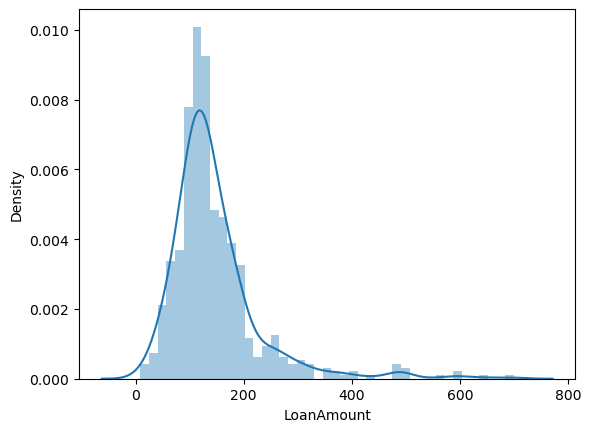

In [102]:
sns.distplot(df["LoanAmount"])

## Data Cleaning:

In [10]:
dc.duplicated().sum()

0

In [11]:
#Checking the % of missing values in each columns.
#Since the % of missing values is between 1% to 10% we can replace them with either mean or median (Numerical data) or Mean (Categorical data)
dc.isnull().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
#Removing those null values one by one
dc["Gender"].mode()[0]
dc["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [13]:
dc["Married"].mode()[0]
dc["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [14]:
#Dropping the dependents and Loan_ID columns and saving it to the variable using Inplace = True
dc.drop("Dependents",axis=1,inplace=True)
dc.drop("Loan_ID",axis=1,inplace=True)
dc.drop("Credit_History",axis=1,inplace=True)

In [15]:
dc

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,Urban,Y


In [16]:
dc.shape

(614, 10)

In [17]:
dc["Self_Employed"].mode()[0]
dc["Self_Employed"]=df["Gender"].fillna(df["Self_Employed"].mode()[0])

In [18]:
dc.isna().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
dc["LoanAmount"].mean()

146.41216216216216

In [20]:
dc["LoanAmount"].median()

128.0

In [21]:
dc["LoanAmount"].median
dc["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

In [22]:
dc["Loan_Amount_Term"].mean()

342.0

In [23]:
dc["Loan_Amount_Term"].median()

360.0

In [24]:
dc["Loan_Amount_Term"].median
dc["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

In [25]:
dc.isna().sum()
#We have replaced all the null values

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
dc["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
dc

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,Graduate,Male,5849,0.0,128.0,360.0,Urban,Y
1,Male,Yes,Graduate,Male,4583,1508.0,128.0,360.0,Rural,N
2,Male,Yes,Graduate,Male,3000,0.0,66.0,360.0,Urban,Y
3,Male,Yes,Not Graduate,Male,2583,2358.0,120.0,360.0,Urban,Y
4,Male,No,Graduate,Male,6000,0.0,141.0,360.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,Female,2900,0.0,71.0,360.0,Rural,Y
610,Male,Yes,Graduate,Male,4106,0.0,40.0,180.0,Rural,Y
611,Male,Yes,Graduate,Male,8072,240.0,253.0,360.0,Urban,Y
612,Male,Yes,Graduate,Male,7583,0.0,187.0,360.0,Urban,Y


In [28]:
Gender=pd.get_dummies(dc['Gender'],drop_first=True)
dc=pd.concat([dc,Gender], axis=1)
dc.drop(['Gender'], axis=1, inplace=True)

dc.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male
0,No,Graduate,Male,5849,0.0,128.0,360.0,Urban,Y,1
1,Yes,Graduate,Male,4583,1508.0,128.0,360.0,Rural,N,1
2,Yes,Graduate,Male,3000,0.0,66.0,360.0,Urban,Y,1
3,Yes,Not Graduate,Male,2583,2358.0,120.0,360.0,Urban,Y,1
4,No,Graduate,Male,6000,0.0,141.0,360.0,Urban,Y,1


In [36]:
Education=pd.get_dummies(dc['Education'],drop_first=True)
dc=pd.concat([dc,Education], axis=1)
dc.drop(['Education'], axis=1, inplace=True)
dc.head()

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male,Not Graduate
0,No,Male,5849,0.0,128.0,360.0,Urban,Y,1,0
1,Yes,Male,4583,1508.0,128.0,360.0,Rural,N,1,0
2,Yes,Male,3000,0.0,66.0,360.0,Urban,Y,1,0
3,Yes,Male,2583,2358.0,120.0,360.0,Urban,Y,1,1
4,No,Male,6000,0.0,141.0,360.0,Urban,Y,1,0


In [37]:
Married=pd.get_dummies(dc['Married'],drop_first=True)
dc=pd.concat([dc,Married], axis=1)
dc.drop(['Married'], axis=1, inplace=True)
dc.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male,Not Graduate,Yes
0,Male,5849,0.0,128.0,360.0,Urban,Y,1,0,0
1,Male,4583,1508.0,128.0,360.0,Rural,N,1,0,1
2,Male,3000,0.0,66.0,360.0,Urban,Y,1,0,1
3,Male,2583,2358.0,120.0,360.0,Urban,Y,1,1,1
4,Male,6000,0.0,141.0,360.0,Urban,Y,1,0,0


In [43]:
Self_Employed=pd.get_dummies(dc['Self_Employed'],drop_first=True)
dc=pd.concat([dc,Self_Employed], axis=1)
dc.drop(['Self_Employed'], axis=1, inplace=True)
dc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male,Not Graduate,Yes,Male,No
0,5849,0.0,128.0,360.0,Urban,Y,1,0,0,1,0
1,4583,1508.0,128.0,360.0,Rural,N,1,0,1,1,0
2,3000,0.0,66.0,360.0,Urban,Y,1,0,1,1,0
3,2583,2358.0,120.0,360.0,Urban,Y,1,1,1,1,0
4,6000,0.0,141.0,360.0,Urban,Y,1,0,0,1,0


In [46]:
Property_Area=pd.get_dummies(dc['Property_Area'],drop_first=True)
dc=pd.concat([dc,Property_Area], axis=1)
dc.drop(['Property_Area'], axis=1, inplace=True)

dc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Not Graduate,Yes,Male,No,Semiurban,Urban
0,5849,0.0,128.0,360.0,Y,1,0,0,1,0,0,1
1,4583,1508.0,128.0,360.0,N,1,0,1,1,0,0,0
2,3000,0.0,66.0,360.0,Y,1,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,Y,1,1,1,1,0,0,1
4,6000,0.0,141.0,360.0,Y,1,0,0,1,0,0,1


In [53]:
#Get data in X & y format
X = dc.drop(columns=['Loan_Status'])
y = dc['Loan_Status']

In [54]:
#Split the data in Train & Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=101)


In [55]:
#Define model
nb_model = GaussianNB()

In [56]:
nb_model

GaussianNB()

In [57]:
#Training the model
nb_model.fit(X_train,y_train)

GaussianNB()

In [60]:
#Predict classes
predicted_class = nb_model.predict(X_test)

In [61]:
# Import Metics
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report

In [62]:
#get the classification report
print(classification_report(predicted_class,y_test))

              precision    recall  f1-score   support

           N       0.02      0.20      0.03         5
           Y       0.97      0.65      0.78       180

    accuracy                           0.64       185
   macro avg       0.49      0.43      0.40       185
weighted avg       0.94      0.64      0.76       185



In [63]:
#Get the confusion matrix
print(confusion_matrix(predicted_class,y_test))

[[  1   4]
 [ 63 117]]


In [64]:
cm = confusion_matrix(predicted_class,y_test)

In [65]:
cm

array([[  1,   4],
       [ 63, 117]], dtype=int64)

<Axes: >

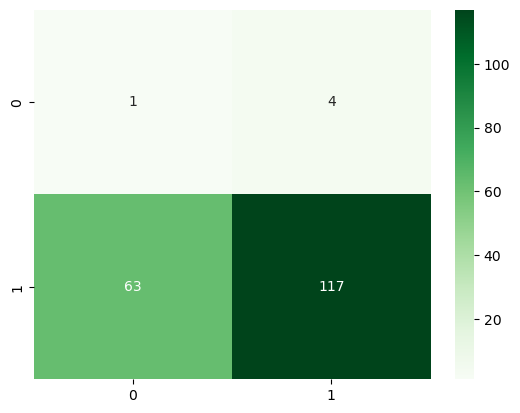

In [73]:
#Print the confusion matrix
sns.heatmap(cm,annot=True,cmap="Greens",fmt='g')

In [93]:
#Import some important metrics
from sklearn.metrics import accuracy_score,auc,roc_curve

In [94]:
#Get accuracy score
accuracy_score(predicted_class,y_test)

0.6378378378378379

In [95]:
#Get the probablity instead of classes
predicted_prob = nb_model.predict_proba(X_test)

In [96]:
# Probablity for 0 and 1
predicted_prob

array([[0.08959592, 0.91040408],
       [0.04248575, 0.95751425],
       [0.12592988, 0.87407012],
       [0.20099582, 0.79900418],
       [0.23587425, 0.76412575],
       [0.23245066, 0.76754934],
       [0.15177688, 0.84822312],
       [0.11401508, 0.88598492],
       [0.16643322, 0.83356678],
       [0.14221339, 0.85778661],
       [0.17199858, 0.82800142],
       [0.1020355 , 0.8979645 ],
       [0.12527282, 0.87472718],
       [0.1169418 , 0.8830582 ],
       [0.05004697, 0.94995303],
       [0.22978471, 0.77021529],
       [0.23420202, 0.76579798],
       [0.04271586, 0.95728414],
       [0.14469671, 0.85530329],
       [0.05224425, 0.94775575],
       [0.11376112, 0.88623888],
       [0.2396592 , 0.7603408 ],
       [0.09443941, 0.90556059],
       [0.16871885, 0.83128115],
       [0.16280313, 0.83719687],
       [0.08989421, 0.91010579],
       [0.21998068, 0.78001932],
       [0.23379279, 0.76620721],
       [0.12520233, 0.87479767],
       [0.17526484, 0.82473516],
       [0.